|||
|-----|----|
|  `Course:` CSE 4238 Soft Computing Lab<br /><br /> `Assignment:` 02<br /><br />`Name:` Dip Chowdhury<br /><br /> `Email:` 170104003@aust.edu <br /><br />`Id:` 170104003<br />

In [ ]:
%%html
<marquee style='width: 30%; color: red;'><b>CSE 4238</b></marquee>

# Google Drive Connect

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Navigating Directories

In [73]:
%cd /content/drive/My Drive/SC/Assignment_2/
ROOT = '/content/drive/My Drive/SC/Assignment_2/'

/content/drive/My Drive/SC/Assignment_2


In [74]:
%ls

 170104003_EX1.pkl
 a/
'Dataset C.zip'
'MNIST Digit Recognizer (Logistic Regression).ipynb'
'MNIST Digit Recognizer (Neural Network and it_s Variations).ipynb'
 training-c/
 training-c.csv
 Untitled0.ipynb


# Importing Libraries

In [75]:
import os, re, sys, pprint, string, math, time, copy
import warnings, random, helper, shutil, cv2
random.seed(5)
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Plotting library
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline
import matplotlib.cm as cm

# Scientific and vector computation for python
import numpy as np
np.random.seed(5)


# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

In [ ]:
from PIL import ImageFile, Image
from textblob import TextBlob
from datetime import datetime
from IPython.display import IFrame, display, HTML
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor,LinearRegression,ElasticNet,BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import  StackingCVRegressor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()
# from fastai.vision.all import *
# from fastbook import *


import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torchsummary import summary
from torch.utils.data import Subset, DataLoader, ConcatDataset, Dataset

# Importing Dataset

In [ ]:
# Dataset Link https://drive.google.com/file/d/10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW/view
# Download
!gdown --id 10TbLFo2cgcmlNjgQMZeiI_D68StH5gfW

# Unzip 
!unzip "/content/drive/My Drive/SC/Assignment_2/Dataset C.zip" -d "/content/drive/My Drive/SC/Assignment_2/"

In [ ]:
%ls

 a/
'Dataset C.zip'
'MNIST Digit Recognizer (Logistic Regression).ipynb'
'MNIST Digit Recognizer (Neural Network and it_s Variations).ipynb'
 training-c/
 training-c.csv
 Untitled0.ipynb


In [ ]:
df = pd.read_csv('/content/drive/My Drive/SC/Assignment_2/training-c.csv')
df.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,c00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c
1,c00001.png,Scan_29_digit_1_num_1.png,29,1,OngkoDB,Buet_Backpropers,training-c
2,c00002.png,Scan_131_digit_3_num_1.png,131,3,OngkoDB,Buet_Backpropers,training-c
3,c00003.png,Scan_160_digit_2_num_2.png,160,2,OngkoDB,Buet_Backpropers,training-c
4,c00004.png,Scan_202_digit_7_num_0.png,202,7,OngkoDB,Buet_Backpropers,training-c


In [ ]:
df = df[['filename', 'digit']]
df.head()

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [ ]:
class Handwritten_Digit_Dataset(Dataset):
  def __init__(self, data, dir, transform = None):
    self.data = data
    self.dir = dir
    self.transform = transform
  
  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    item = self.data.iloc[index]
    path = self.dir + "/" + item[0]
    image = Image.open(path).convert('L')
    label = item[1]
    
    if self.transform is not None:
      image = self.transform(image)
      
    return image, label

In [ ]:
mean = [0.5,]
std = [0.5,]
train_transform = transforms.Compose([
                                      transforms.Resize(32),
                                      torchvision.transforms.ColorJitter(brightness=0.4,saturation=0.4,contrast=0.4,hue=0.4),
                                      transforms.RandomRotation(20),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5,], [0.5,])
                                      ])

test_transform = transforms.Compose([
                                      transforms.Resize(32),
                                      torchvision.transforms.ColorJitter(brightness=0.4,saturation=0.4,contrast=0.4,hue=0.4),
                                      transforms.RandomRotation(20),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

dir = '/content/drive/My Drive/SC/Assignment_2/training-c'
dataset  = Handwritten_Digit_Dataset(df, dir, train_transform)

print("Total Images: ",len(dataset))

Total Images:  24298


In [ ]:
BATCH_SIZE = 20

train_set, test_set = torch.utils.data.random_split(dataset, [19438, 4860]) #80%
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

print("Train Images: ",len(train_set))
print("Test Images: ",len(test_set))
print("Train Batch: ",len(train_loader))

Train Images:  19438
Test Images:  4860
Train Batch:  972


In [ ]:
%ls

In [ ]:
# Hyperparameters
batch_size = 30
num_hidden = 200
num_iters = 20000
learning_rate = 0.01
input_dim = 32*32
output_dim = 10

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name())

Tesla K80


In [ ]:
#DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__() 
        
        self.fc1 = nn.Linear(input_size, num_hidden) 
        self.fc2 = nn.Linear(num_hidden, num_hidden) 
        self.fc3 = nn.Linear(num_hidden, num_hidden) 
        self.fc4 = nn.Linear(num_hidden, num_hidden) 
        self.fc5 = nn.Linear(num_hidden, num_hidden) 
        self.fc6 = nn.Linear(num_hidden, num_hidden) 
        self.out = nn.Linear(num_hidden, num_classes)
      
        #dropout to reduce overfitting
        #self.drop = nn.Dropout(0.25) 
        
        self.out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        x=x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.out(x)
        #x = self.drop(x)
        x = x
        return x

In [ ]:
model = DNN(input_size=input_dim, num_classes=output_dim, num_hidden=num_hidden)
#Store in GPU
model.to(device)
print(model)

DNN(
  (fc1): Linear(in_features=1024, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=200, bias=True)
  (fc6): Linear(in_features=200, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=10, bias=True)
)


In [ ]:
#optimizer =  torcch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
stepcount = []
train_loss = []
train_loss2 = []
train_accuracy = []
test_accuracy = []
totalsteps = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1
        #train_loss2 += loss.item()
        if iter % 100 == 0:  
            correct_test = 0
            total_test = 0

            for images, labels in test_loader:
                images = images.view(-1, input_dim).to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                if torch.cuda.is_available():
                    correct_test += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct_test += (predicted == labels).sum()  

            accuracy_test = 100 * correct_test.item() / total_test

            train_loss.append(loss.item())
            test_accuracy.append(accuracy_test)
            
            totalsteps.append(iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy_test))
            accuracy_test = 0

Iteration: 100. Loss: 2.3041341304779053. Accuracy: 9.588477366255145
Iteration: 200. Loss: 2.3057243824005127. Accuracy: 9.588477366255145
Iteration: 300. Loss: 2.3089475631713867. Accuracy: 9.588477366255145
Iteration: 400. Loss: 2.2931435108184814. Accuracy: 9.91769547325103
Iteration: 500. Loss: 2.3097915649414062. Accuracy: 9.8559670781893
Iteration: 600. Loss: 2.300231695175171. Accuracy: 9.8559670781893
Iteration: 700. Loss: 2.3054778575897217. Accuracy: 9.650205761316872
Iteration: 800. Loss: 2.3083951473236084. Accuracy: 9.8559670781893
Iteration: 900. Loss: 2.3013222217559814. Accuracy: 9.753086419753087
Iteration: 1000. Loss: 2.3036680221557617. Accuracy: 9.814814814814815
Iteration: 1100. Loss: 2.303455114364624. Accuracy: 10.020576131687243
Iteration: 1200. Loss: 2.297227144241333. Accuracy: 9.91769547325103
Iteration: 1300. Loss: 2.2973885536193848. Accuracy: 9.77366255144033
Iteration: 1400. Loss: 2.305769920349121. Accuracy: 9.835390946502057
Iteration: 1500. Loss: 2.29

KeyboardInterrupt: ignored

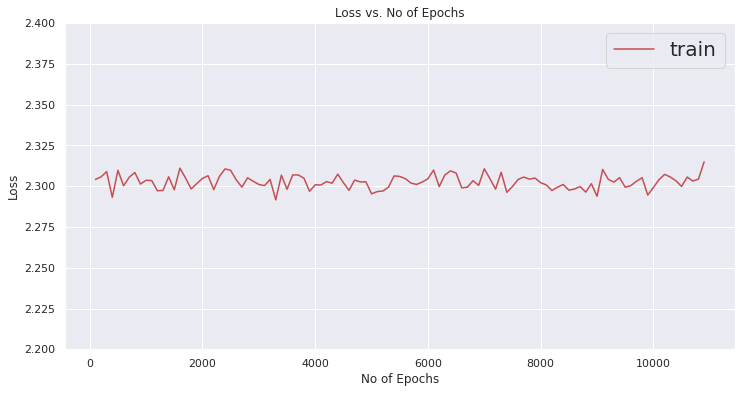

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Loss vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.plot(totalsteps, train_loss,'r-', label="train")
#plt.plot(range(NUM_EPOCHS), val_loss_hist,'b-', label="val")
plt.ylim((2.2,2.4))
plt.legend(prop={'size': 20}, loc='upper right')

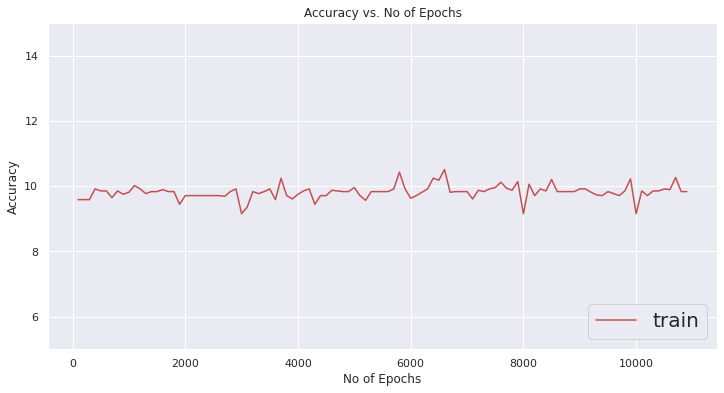

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Accuracy vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.plot(totalsteps, test_accuracy,'r-', label="train")
plt.ylim((5,15))
plt.legend(prop={'size': 20}, loc='lower right')
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/SC/Assignment_2/170104003_EX1.pkl')

# Ex2

In [84]:
# Hyperparameters
batch_size = 32
num_hidden = 512
num_iters = 20000
learning_rate = 0.1
input_dim = 32*32
output_dim = 10
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name())

Tesla K80


In [89]:
class DNN(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__() 
        
        self.fc1 = nn.Linear(input_size, num_hidden) 
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 128) 
        self.out = nn.Linear(128, num_classes)
      
        #dropout to reduce overfitting
        #self.drop = nn.Dropout(0.25) 
      

    def forward(self, x):
        x=x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        #x = self.drop(x)

        return x

In [90]:
model = DNN(input_size=input_dim, num_classes=output_dim, num_hidden=num_hidden)
#Store in GPU
model.to(device)
print(model)
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

DNN(
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


In [91]:
stepcount = []
train_loss = []
train_loss2 = []
train_accuracy = []
test_accuracy = []
totalsteps = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1
        #train_loss2 += loss.item()
        if iter % 100 == 0:  
            correct_test = 0
            total_test = 0

            for images, labels in test_loader:
                images = images.view(-1, input_dim).to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                if torch.cuda.is_available():
                    correct_test += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct_test += (predicted == labels).sum()  

            accuracy_test = 100 * correct_test.item() / total_test

            train_loss.append(loss.item())
            test_accuracy.append(accuracy_test)
            
            totalsteps.append(iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy_test))
            accuracy_test = 0

Iteration: 100. Loss: 2.317145824432373. Accuracy: 9.938271604938272
Iteration: 200. Loss: 2.29887056350708. Accuracy: 9.814814814814815
Iteration: 300. Loss: 2.317521572113037. Accuracy: 10.452674897119342
Iteration: 400. Loss: 2.3193554878234863. Accuracy: 9.938271604938272
Iteration: 500. Loss: 2.314833164215088. Accuracy: 10.308641975308642
Iteration: 600. Loss: 2.3193767070770264. Accuracy: 9.835390946502057
Iteration: 700. Loss: 2.310800313949585. Accuracy: 10.246913580246913
Iteration: 800. Loss: 2.321052074432373. Accuracy: 9.958847736625515
Iteration: 900. Loss: 2.296360969543457. Accuracy: 9.7119341563786
Iteration: 1000. Loss: 2.3291525840759277. Accuracy: 9.8559670781893
Iteration: 1100. Loss: 2.308713674545288. Accuracy: 9.8559670781893
Iteration: 1200. Loss: 2.304628372192383. Accuracy: 9.8559670781893
Iteration: 1300. Loss: 2.2706799507141113. Accuracy: 9.7119341563786
Iteration: 1400. Loss: 2.31205677986145. Accuracy: 9.7119341563786
Iteration: 1500. Loss: 2.29106569290

KeyboardInterrupt: ignored

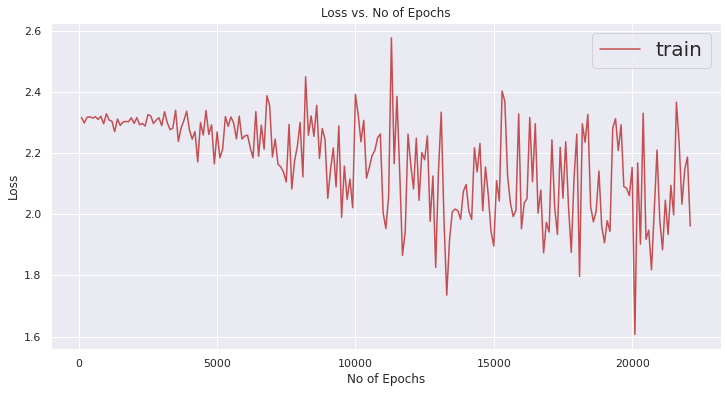

In [92]:
plt.figure(figsize=(12,6))
plt.title("Loss vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.plot(totalsteps, train_loss,'r-', label="train")
#plt.plot(range(NUM_EPOCHS), val_loss_hist,'b-', label="val")
#plt.ylim((2.2,2.4))
plt.legend(prop={'size': 20}, loc='upper right')

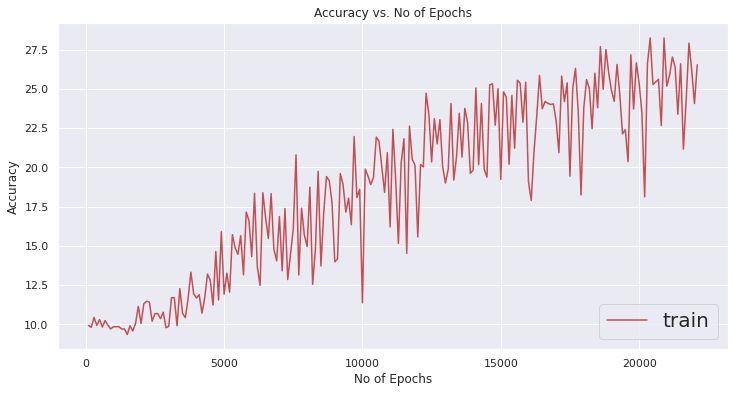

In [93]:
plt.figure(figsize=(12,6))
plt.title("Accuracy vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.plot(totalsteps, test_accuracy,'r-', label="train")
#plt.ylim((5,15))
plt.legend(prop={'size': 20}, loc='lower right')
plt.show()

## EX 3

In [105]:
BATCH_SIZE = 64

train_set, test_set = torch.utils.data.random_split(dataset, [19438, 4860]) #80%
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

print("Train Images: ",len(train_set))
print("Test Images: ",len(test_set))
print("Train Batch: ",len(train_loader))

Train Images:  19438
Test Images:  4860
Train Batch:  304


In [106]:
# Hyperparameters
batch_size = 64
num_hidden = 1024
num_iters = 100000
learning_rate = 0.05
input_dim = 32*32
output_dim = 10
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name())

Tesla K80


In [107]:
class DNN(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__() 
        
        self.fc1 = nn.Linear(input_size, num_hidden) 
        self.fc2 = nn.Linear(1024, 512) 
        self.fc3 = nn.Linear(512, 256) 
        self.fc4 = nn.Linear(256, 256) 
        self.out = nn.Linear(256, num_classes)
      
        #dropout to reduce overfitting
        #self.drop = nn.Dropout(0.25) 
      

    def forward(self, x):
        x=x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        #x = self.drop(x)

        return x

In [108]:
model = DNN(input_size=input_dim, num_classes=output_dim, num_hidden=num_hidden)
#Store in GPU
model.to(device)
print(model)
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

DNN(
  (fc1): Linear(in_features=1024, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
stepcount = []
train_loss = []
train_loss2 = []
train_accuracy = []
test_accuracy = []
totalsteps = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, input_dim).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1
        #train_loss2 += loss.item()
        if iter % 100 == 0:  
            correct_test = 0
            total_test = 0

            for images, labels in test_loader:
                images = images.view(-1, input_dim).to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                if torch.cuda.is_available():
                    correct_test += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct_test += (predicted == labels).sum()  

            accuracy_test = 100 * correct_test.item() / total_test

            train_loss.append(loss.item())
            test_accuracy.append(accuracy_test)
            
            totalsteps.append(iter)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy_test))
            accuracy_test = 0

Iteration: 100. Loss: 2.3029239177703857. Accuracy: 9.25925925925926
Iteration: 200. Loss: 2.3051726818084717. Accuracy: 9.835390946502057
Iteration: 300. Loss: 2.3003456592559814. Accuracy: 10.679012345679013
Iteration: 400. Loss: 2.3012986183166504. Accuracy: 10.905349794238683
Iteration: 500. Loss: 2.3014934062957764. Accuracy: 9.897119341563785
Iteration: 600. Loss: 2.3036012649536133. Accuracy: 9.835390946502057
Iteration: 700. Loss: 2.3024818897247314. Accuracy: 9.897119341563785
Iteration: 800. Loss: 2.3008694648742676. Accuracy: 10.946502057613168
Iteration: 900. Loss: 2.305236577987671. Accuracy: 10.637860082304528
Iteration: 1000. Loss: 2.3034422397613525. Accuracy: 10.51440329218107
Iteration: 1100. Loss: 2.301180839538574. Accuracy: 10.308641975308642
Iteration: 1200. Loss: 2.2985334396362305. Accuracy: 9.650205761316872
Iteration: 1300. Loss: 2.3006250858306885. Accuracy: 10.185185185185185
Iteration: 1400. Loss: 2.300177574157715. Accuracy: 10.041152263374485
Iteration: 1

In [1]:
torch.save(model.state_dict(), '/content/drive/My Drive/SC/Assignment_2/170104003_EX2.pkl')

NameError: ignored

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Loss vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.plot(totalsteps, train_loss,'r-', label="train")
#plt.plot(range(NUM_EPOCHS), val_loss_hist,'b-', label="val")
#plt.ylim((2.2,2.4))
plt.legend(prop={'size': 20}, loc='upper right')

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Accuracy vs. No of Epochs")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.plot(totalsteps, test_accuracy,'r-', label="train")
#plt.ylim((5,15))
plt.legend(prop={'size': 20}, loc='lower right')
plt.show()